# import

In [462]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV



In [463]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 



{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [464]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [465]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


# dataset

In [466]:
data = pd.concat([X, y], axis=1)
data

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [467]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [468]:
data.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [469]:
data.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

day_of_week i month izbacujemo jer tu nformaciju imamo u pdays koloni

poutcome izbacujemo jer ima previse null vrednosti

In [470]:
data = data.drop(columns=['poutcome', 'day_of_week', 'month', 'contact'])

In [471]:
dataset = data.dropna()
dataset

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,217,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,508,4,-1,0,no


In [472]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [473]:
dataset

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,217,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,508,4,-1,0,no


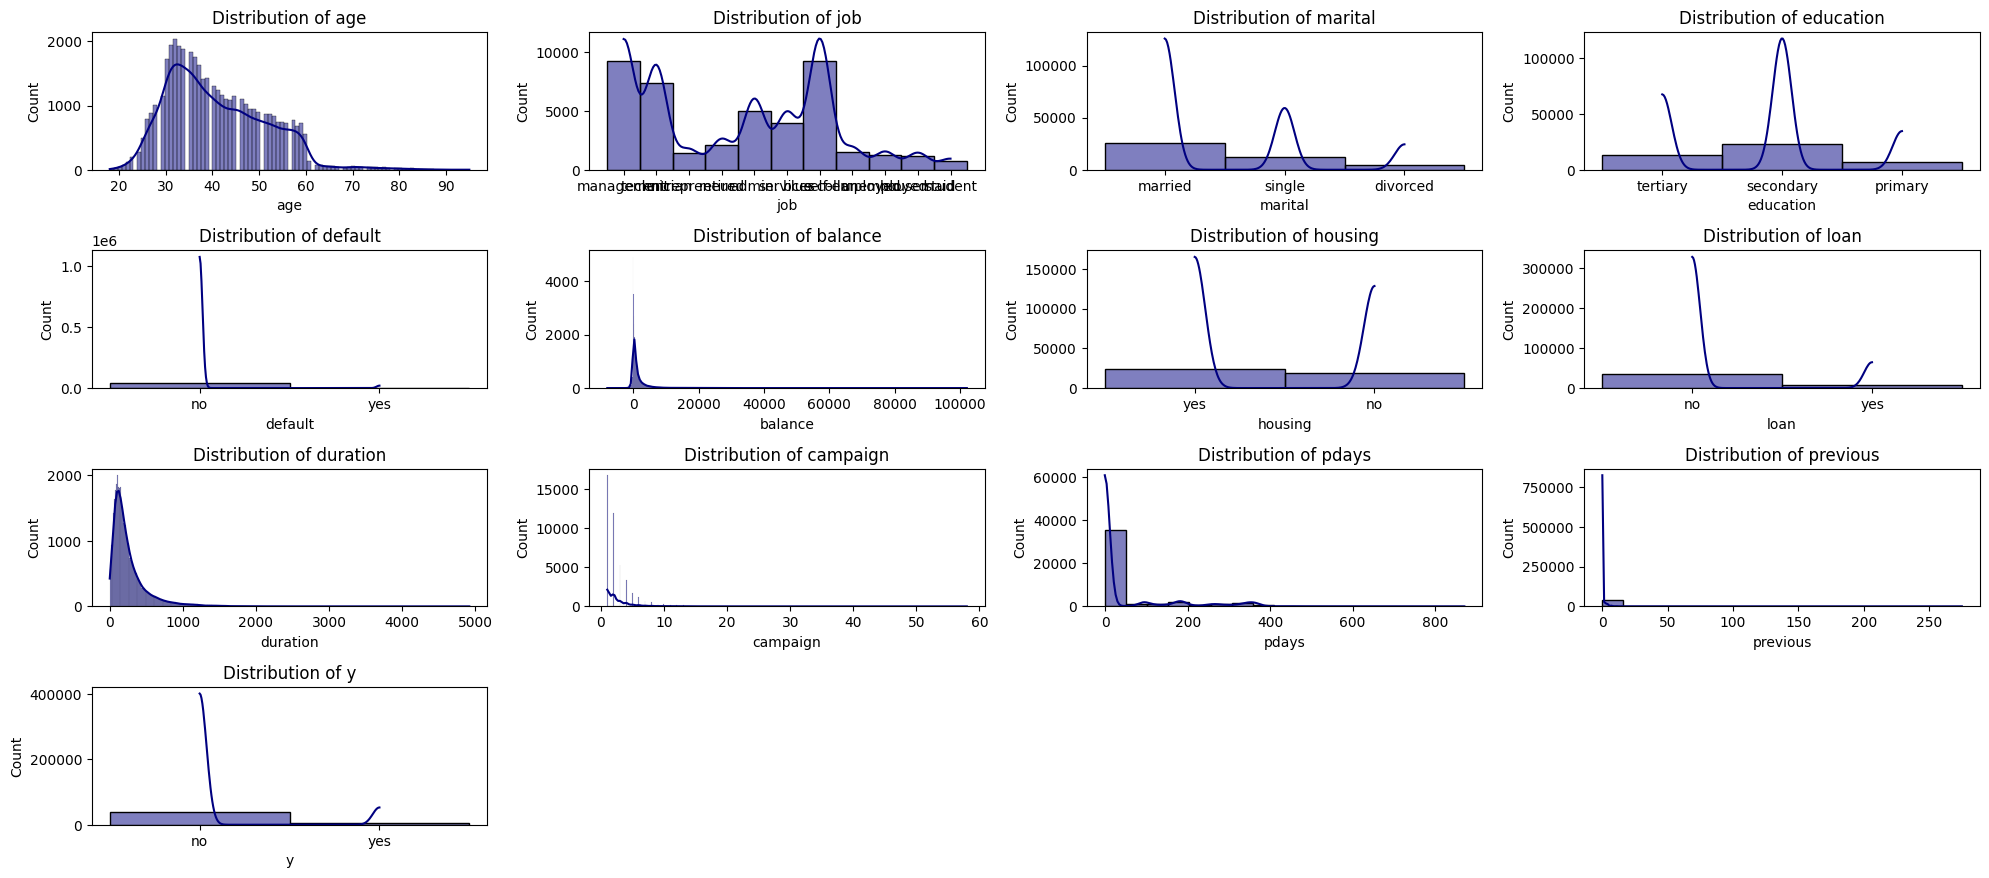

In [474]:
num_rows = (len(dataset.columns) - 1) // 2 + 1
num_columns = min(4, len(dataset.columns))

plt.figure(figsize=(20, 15))

for i, attribute in enumerate(dataset.columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.histplot(dataset[attribute], kde=True, color='navy')
    plt.title(f'Distribution of {attribute}')

plt.tight_layout()
plt.show()


In [475]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43193 non-null  int64 
 1   job        43193 non-null  object
 2   marital    43193 non-null  object
 3   education  43193 non-null  object
 4   default    43193 non-null  object
 5   balance    43193 non-null  int64 
 6   housing    43193 non-null  object
 7   loan       43193 non-null  object
 8   duration   43193 non-null  int64 
 9   campaign   43193 non-null  int64 
 10  pdays      43193 non-null  int64 
 11  previous   43193 non-null  int64 
 12  y          43193 non-null  object
dtypes: int64(6), object(7)
memory usage: 4.6+ MB


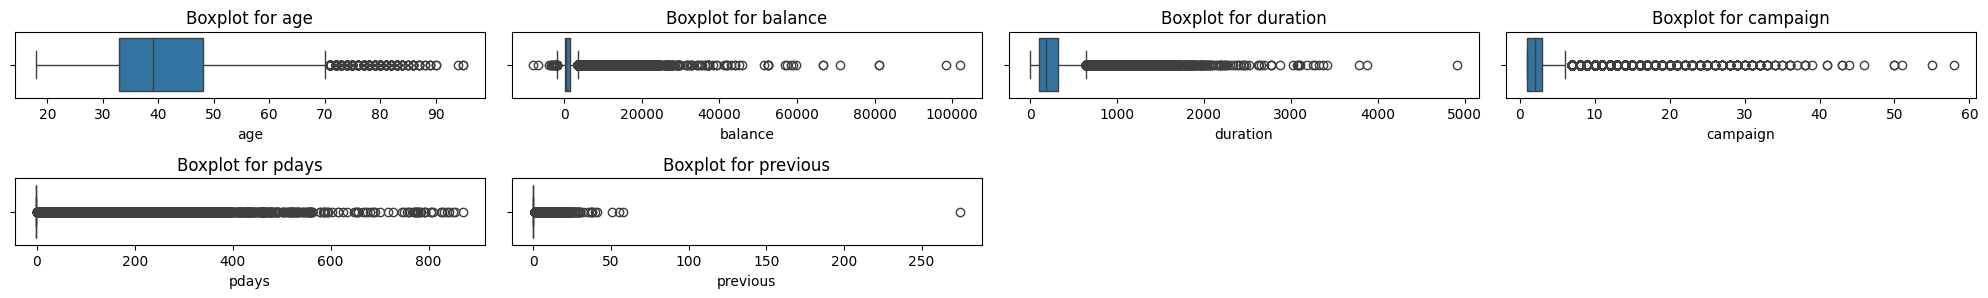

In [476]:
numerical_cols = ['age', 'balance', 'duration' , 'campaign', 'pdays', 'previous']
plt.figure(figsize=(20, 10))

for i, attribute in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=dataset[attribute])
    plt.title(f'Boxplot for {attribute}')

plt.tight_layout()
plt.show()


In [477]:
dataset2 = dataset.copy()

In [478]:
dataset = dataset2.copy()

In [479]:
remove_count = (dataset['duration'] >= 2500)|(dataset['balance'] >= 50000)|(dataset['age'] >= 90)|(dataset['campaign'] >= 40)|(dataset['previous'] >= 35)
remove_count.sum()

np.int64(67)

In [480]:
index = dataset[remove_count].index
dataset.drop(index, inplace=True)
dataset.describe()

,age,balance,duration,campaign,pdays,previous
count,43126.000000,43126.000000,43126.000000,43126.000000,43126.000000,43126.000000
mean,40.753351,1329.011849,256.821778,2.746441,40.374090,0.569285
std,10.493605,2743.620298,249.292004,2.978541,100.311392,1.808582
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,442.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1411.000000,318.000000,3.000000,-1.000000,0.000000
max,89.000000,45789.000000,2485.000000,39.000000,871.000000,32.000000


# preprocesiranje

In [481]:
dataset.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
duration      int64
campaign      int64
pdays         int64
previous      int64
y            object
dtype: object

In [482]:
objectCols = ['job','marital',"housing", 'loan', 'contact', 'y']

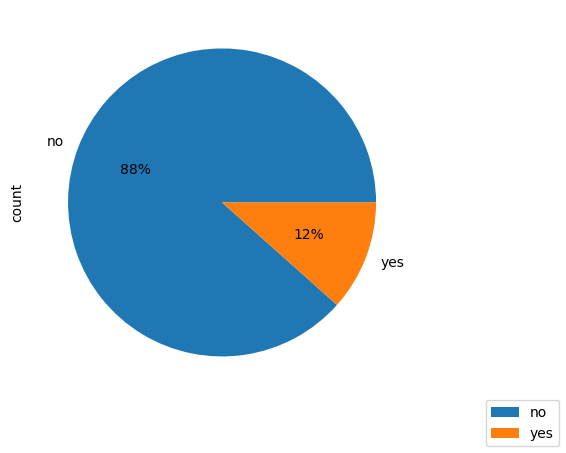

In [483]:
plt.figure(figsize=(7, 5))
pie = dataset.y.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
plt.show()


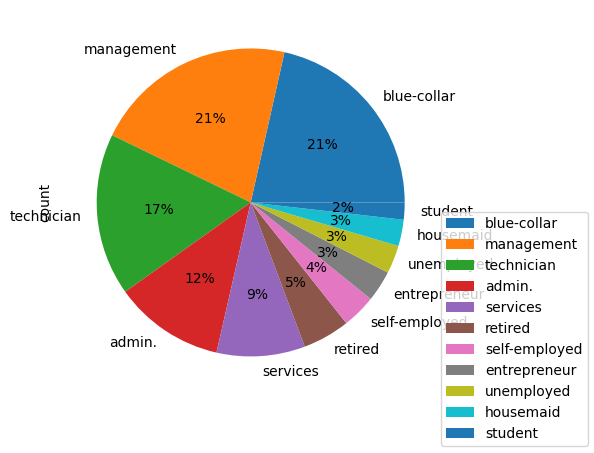

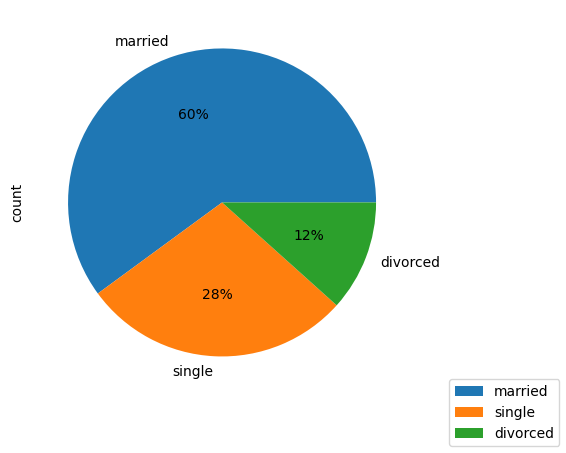

In [484]:
plt.figure(figsize=(7, 5))
pie = dataset.job.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
plt.show()

plt.figure(figsize=(7, 5))
pie = dataset.marital.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
plt.show()


In [485]:
bin_cols=['default','housing','loan','y']

for col in bin_cols:
    dataset[col] = dataset[col].map({'yes':1,'no':0})

dataset.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,76,1,-1,0,0
5,35,management,married,tertiary,0,231,1,0,139,1,-1,0,0
6,28,management,single,tertiary,0,447,1,1,217,1,-1,0,0


In [486]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()

dataset[list(dataset["job"].unique())] = one.fit_transform(dataset[["job"]]).toarray()
dataset.drop("job", axis=1, inplace=True)

dataset


,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,technician,entrepreneur,retired,admin.,services,blue-collar,self-employed,unemployed,housemaid,student
0,58,married,tertiary,0,2143,1,0,261,1,-1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44,single,secondary,0,29,1,0,151,1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,33,married,secondary,0,2,1,1,76,1,-1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,35,married,tertiary,0,231,1,0,139,1,-1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,28,single,tertiary,0,447,1,1,217,1,-1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,0,825,0,0,977,3,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45207,71,divorced,primary,0,1729,0,0,456,2,-1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45208,72,married,secondary,0,5715,0,0,1127,5,184,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45209,57,married,secondary,0,668,0,0,508,4,-1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [487]:
edu=pd.get_dummies(dataset['education'],drop_first=True)
status=pd.get_dummies(dataset['marital'],drop_first=True)


In [488]:

dataset=pd.concat([dataset,edu,status],axis=1)
dataset


,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,services,blue-collar,self-employed,unemployed,housemaid,student,secondary,tertiary,married,single
0,58,married,tertiary,0,2143,1,0,261,1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,False,True,True,False
1,44,single,secondary,0,29,1,0,151,1,-1,...,0.0,0.0,0.0,0.0,1.0,0.0,True,False,False,True
2,33,married,secondary,0,2,1,1,76,1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False
5,35,married,tertiary,0,231,1,0,139,1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,False,True,True,False
6,28,single,tertiary,0,447,1,1,217,1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,0,825,0,0,977,3,-1,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,True,False
45207,71,divorced,primary,0,1729,0,0,456,2,-1,...,1.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False
45208,72,married,secondary,0,5715,0,0,1127,5,184,...,1.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False
45209,57,married,secondary,0,668,0,0,508,4,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False


In [489]:

dataset.drop("marital",axis = 1, inplace = True)
dataset.drop("education",axis = 1, inplace = True)
dataset

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,services,blue-collar,self-employed,unemployed,housemaid,student,secondary,tertiary,married,single
0,58,0,2143,1,0,261,1,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,True,True,False
1,44,0,29,1,0,151,1,-1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,True,False,False,True
2,33,0,2,1,1,76,1,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False
5,35,0,231,1,0,139,1,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,True,True,False
6,28,0,447,1,1,217,1,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,True,False
45207,71,0,1729,0,0,456,2,-1,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False
45208,72,0,5715,0,0,1127,5,184,3,1,...,1.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False
45209,57,0,668,0,0,508,4,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False


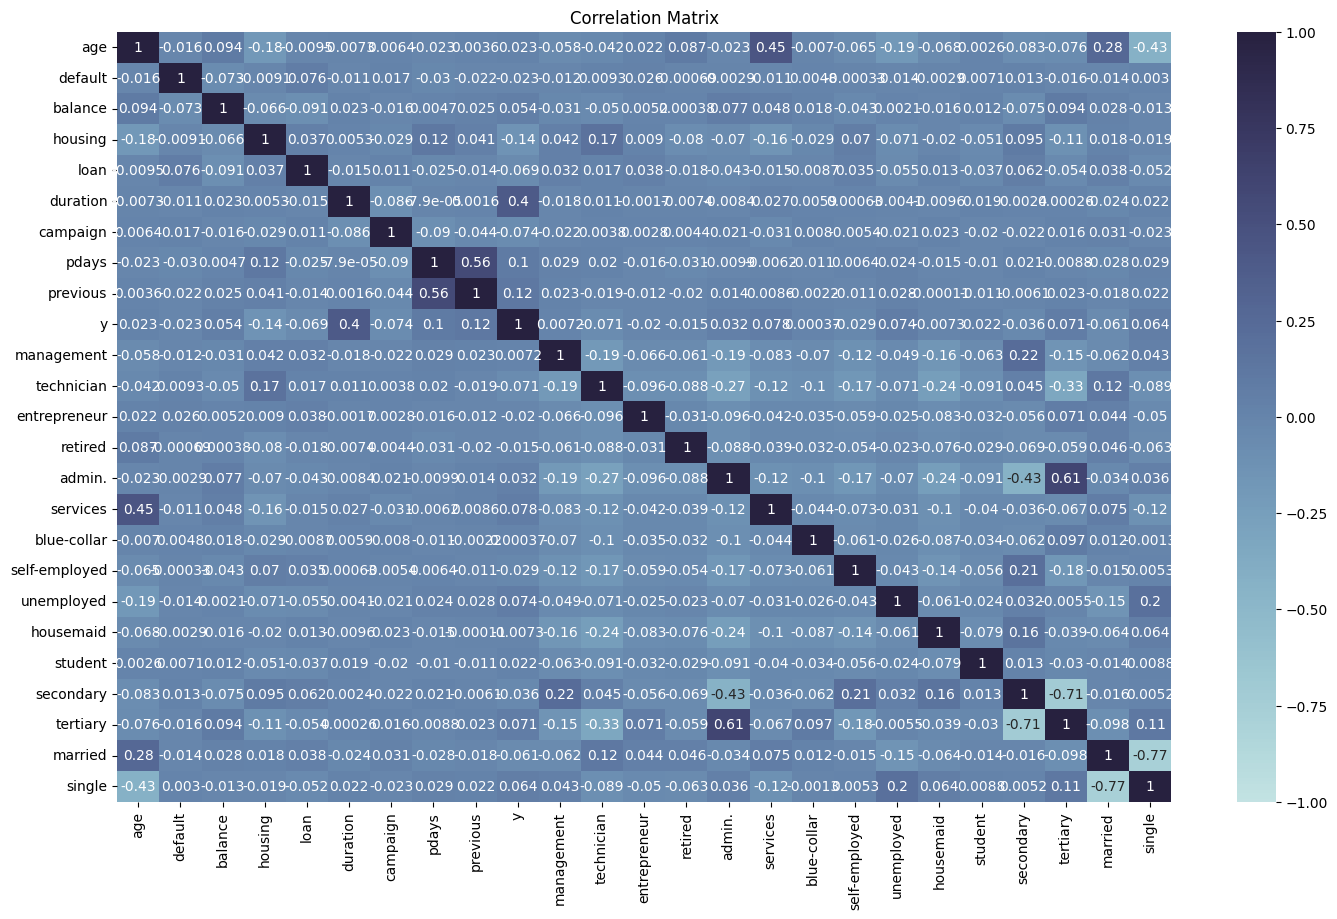

In [490]:
corr_matrix = dataset.corr()

plt.figure(figsize=(17,10))
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [491]:
X=dataset.drop(columns='y')
X

,age,default,balance,housing,loan,duration,campaign,pdays,previous,management,...,services,blue-collar,self-employed,unemployed,housemaid,student,secondary,tertiary,married,single
0,58,0,2143,1,0,261,1,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,True,True,False
1,44,0,29,1,0,151,1,-1,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,True,False,False,True
2,33,0,2,1,1,76,1,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False
5,35,0,231,1,0,139,1,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,True,True,False
6,28,0,447,1,1,217,1,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,False,True,True,False
45207,71,0,1729,0,0,456,2,-1,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False
45208,72,0,5715,0,0,1127,5,184,3,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False
45209,57,0,668,0,0,508,4,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False


In [492]:
y = dataset.y
y

0        0
1        0
2        0
5        0
6        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 43126, dtype: int64

In [493]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

print("Original:", y.value_counts())
print("Balansirano:", pd.Series(y_resampled).value_counts())

Original: y
0    38127
1     4999
Name: count, dtype: int64
Balansirano: y
1    31305
0    26253
Name: count, dtype: int64


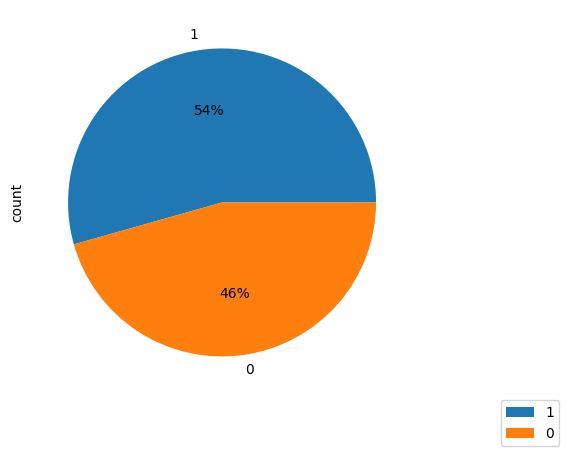

In [494]:
plt.figure(figsize=(7, 5))
pie = y_resampled.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
plt.show()


In [495]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [496]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=67)

# trazenje parametara

In [497]:
param_dist = {
   "max_depth": [3,5,7, None],
    "max_features": range(1, 10),
    "min_samples_leaf": range(1, 10),
    'min_samples_split': [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

# grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), 
#                            param_grid=param_dist, 
#                            cv=5,  
#                            scoring='accuracy')


# grid_search.fit(X_train, y_train)

# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)


# Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
# Best Accuracy: 0.9419928788447407


In [498]:
cv=KFold(n_splits=5, shuffle=True, random_state=12)

# decision tree sa best parametrima

In [499]:
decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                    max_features=8, min_samples_leaf=1,
                    min_samples_split=2, random_state=43
                    )

model = decision_tree.fit(X_train, y_train)


In [500]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Tačnost stabla odlučivanja bez kros validacije:  {accuracy}%")

Tačnost stabla odlučivanja bez kros validacije:  0.9426685198054204%


In [501]:

predictions = cross_val_predict(decision_tree, X_test, y_test, cv=cv)
scores = cross_val_score(decision_tree, X_test, y_test, cv=cv, scoring="accuracy")
average_accuracy = np.mean(scores)

print(f"Tačnost stabla odlučivanja sa kros validacijom:  {average_accuracy}%")

Tačnost stabla odlučivanja sa kros validacijom:  0.9213855081933323%


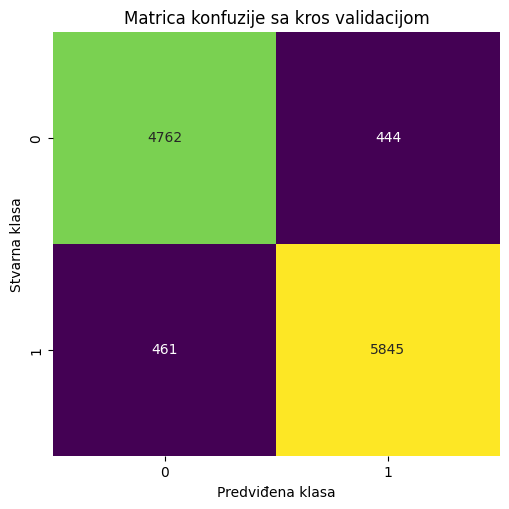

In [502]:
class_names=[0,1]
matrix = confusion_matrix(y_test, predictions)

dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

plt.figure(figsize=(5,5))
sns.heatmap(dataframe, annot=True, cbar=None, fmt='d', cmap="viridis")
plt.title("Matrica konfuzije sa kros validacijom"), plt.tight_layout()
plt.ylabel("Stvarna klasa"), plt.xlabel("Predviđena klasa")
plt.show()

In [503]:
target_names = ['0', '1']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5206
           1       0.95      0.95      0.95      6306

    accuracy                           0.94     11512
   macro avg       0.94      0.94      0.94     11512
weighted avg       0.94      0.94      0.94     11512



In [504]:
target_names = ['0', '1']
report = classification_report(y_test, predictions, target_names=target_names)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      5206
           1       0.93      0.93      0.93      6306

    accuracy                           0.92     11512
   macro avg       0.92      0.92      0.92     11512
weighted avg       0.92      0.92      0.92     11512



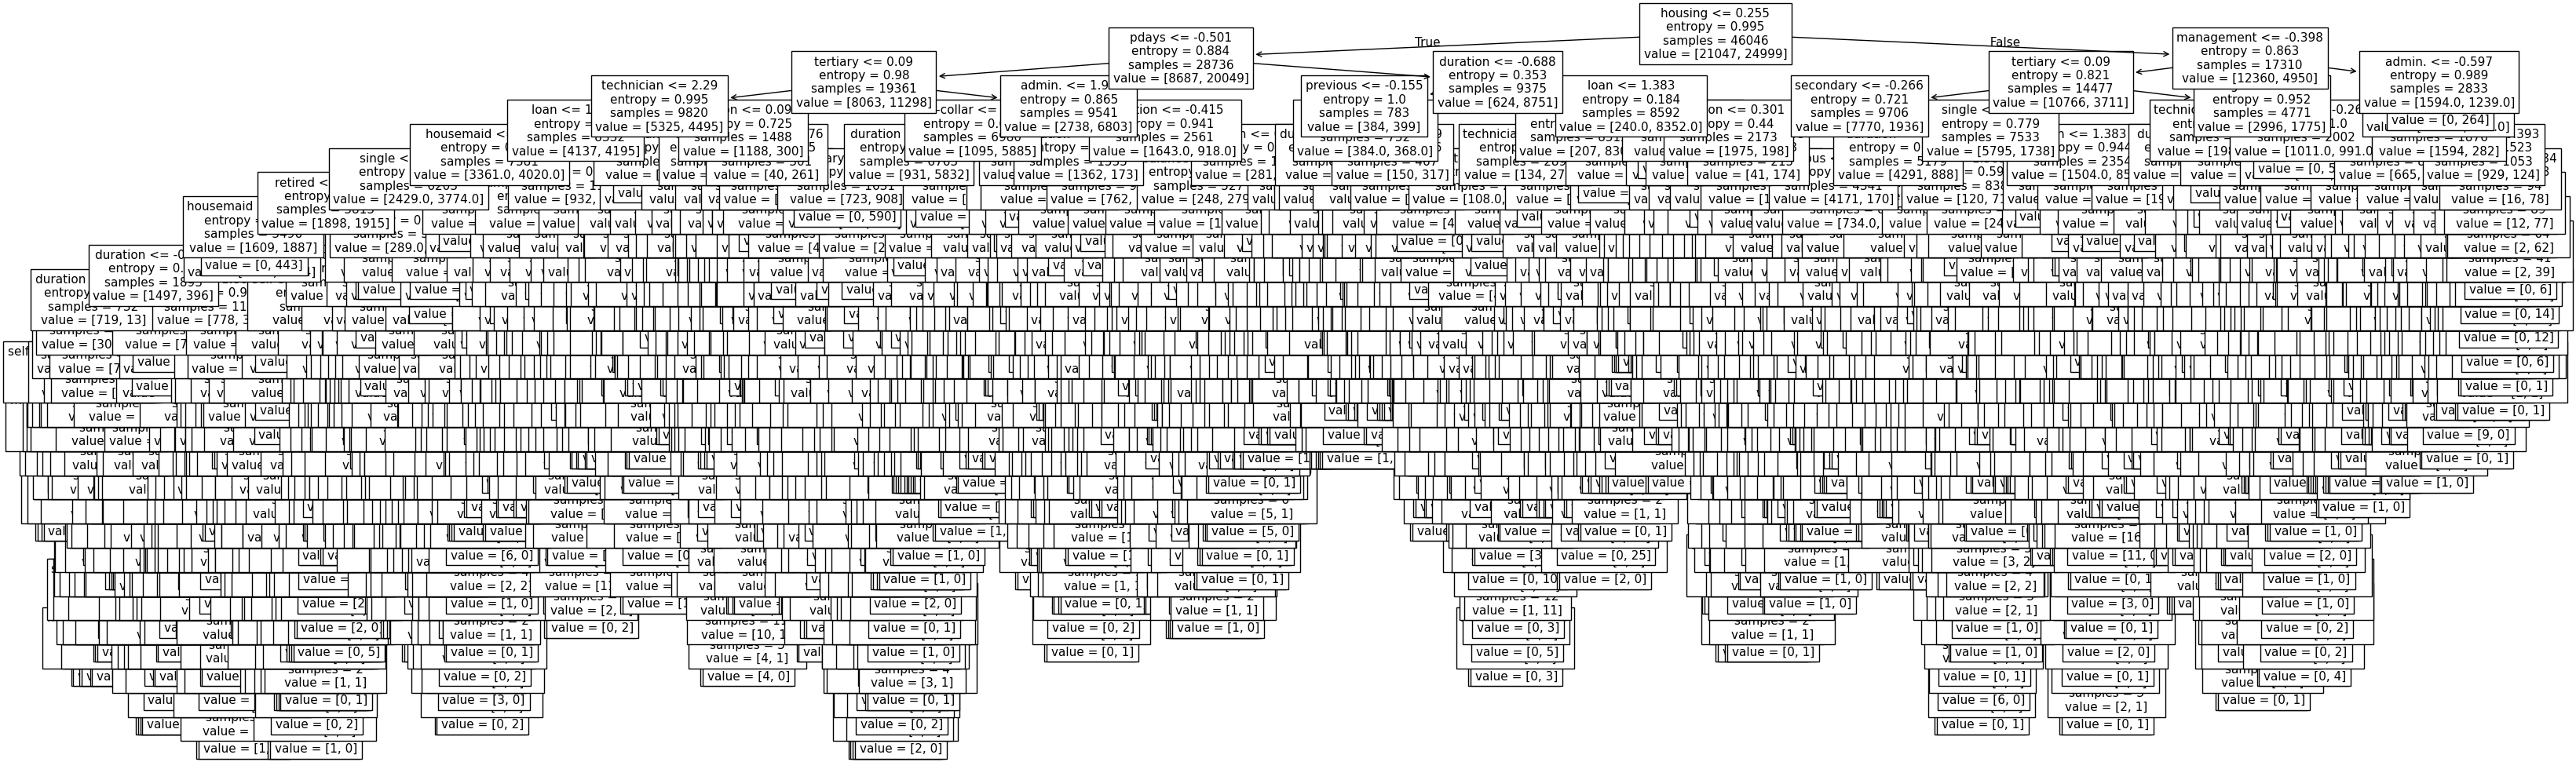

In [505]:
feature_names = list(X.columns)

fig, ax = plt.subplots(figsize=(40, 12))
tree.plot_tree(decision_tree, feature_names=feature_names, fontsize=11)
plt.show()

# decision tree sa gini

In [506]:

decision_tree1 = DecisionTreeClassifier(criterion='gini', splitter='best', 
                    min_samples_split=2, min_samples_leaf=1, random_state=43)

model = decision_tree1.fit(X_train, y_train)

y_pred = decision_tree1.predict(X_test)

print("Tačnost stabla odlučivanja primenom gini:")
print(accuracy_score(y_test, y_pred))

Tačnost stabla odlučivanja primenom gini:
0.9427553856845031


In [507]:
predictions = cross_val_predict(decision_tree1, X_test, y_test, cv=cv)
score=cross_val_score(decision_tree1, X_test, y_test, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy (Entropy):  {average}%")

Average Cross Validation Accuracy (Entropy):  0.915392645033317%


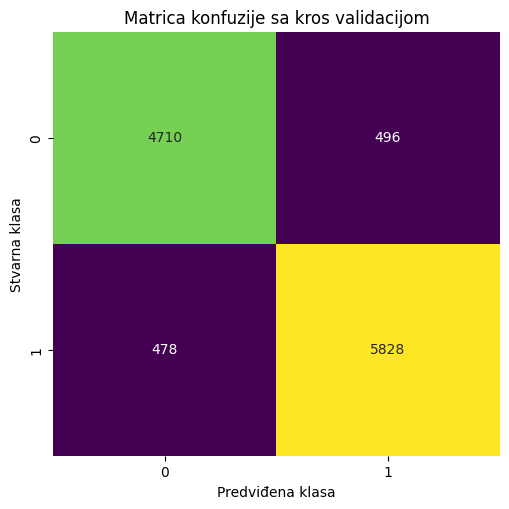

In [508]:
conf_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title("Matrica konfuzije sa kros validacijom"), plt.tight_layout()
plt.ylabel("Stvarna klasa"), plt.xlabel("Predviđena klasa")
plt.show()

In [509]:
target_names = ['0', '1']
report = classification_report(y_test, predictions, target_names=target_names)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      5206
           1       0.92      0.92      0.92      6306

    accuracy                           0.92     11512
   macro avg       0.91      0.91      0.91     11512
weighted avg       0.92      0.92      0.92     11512



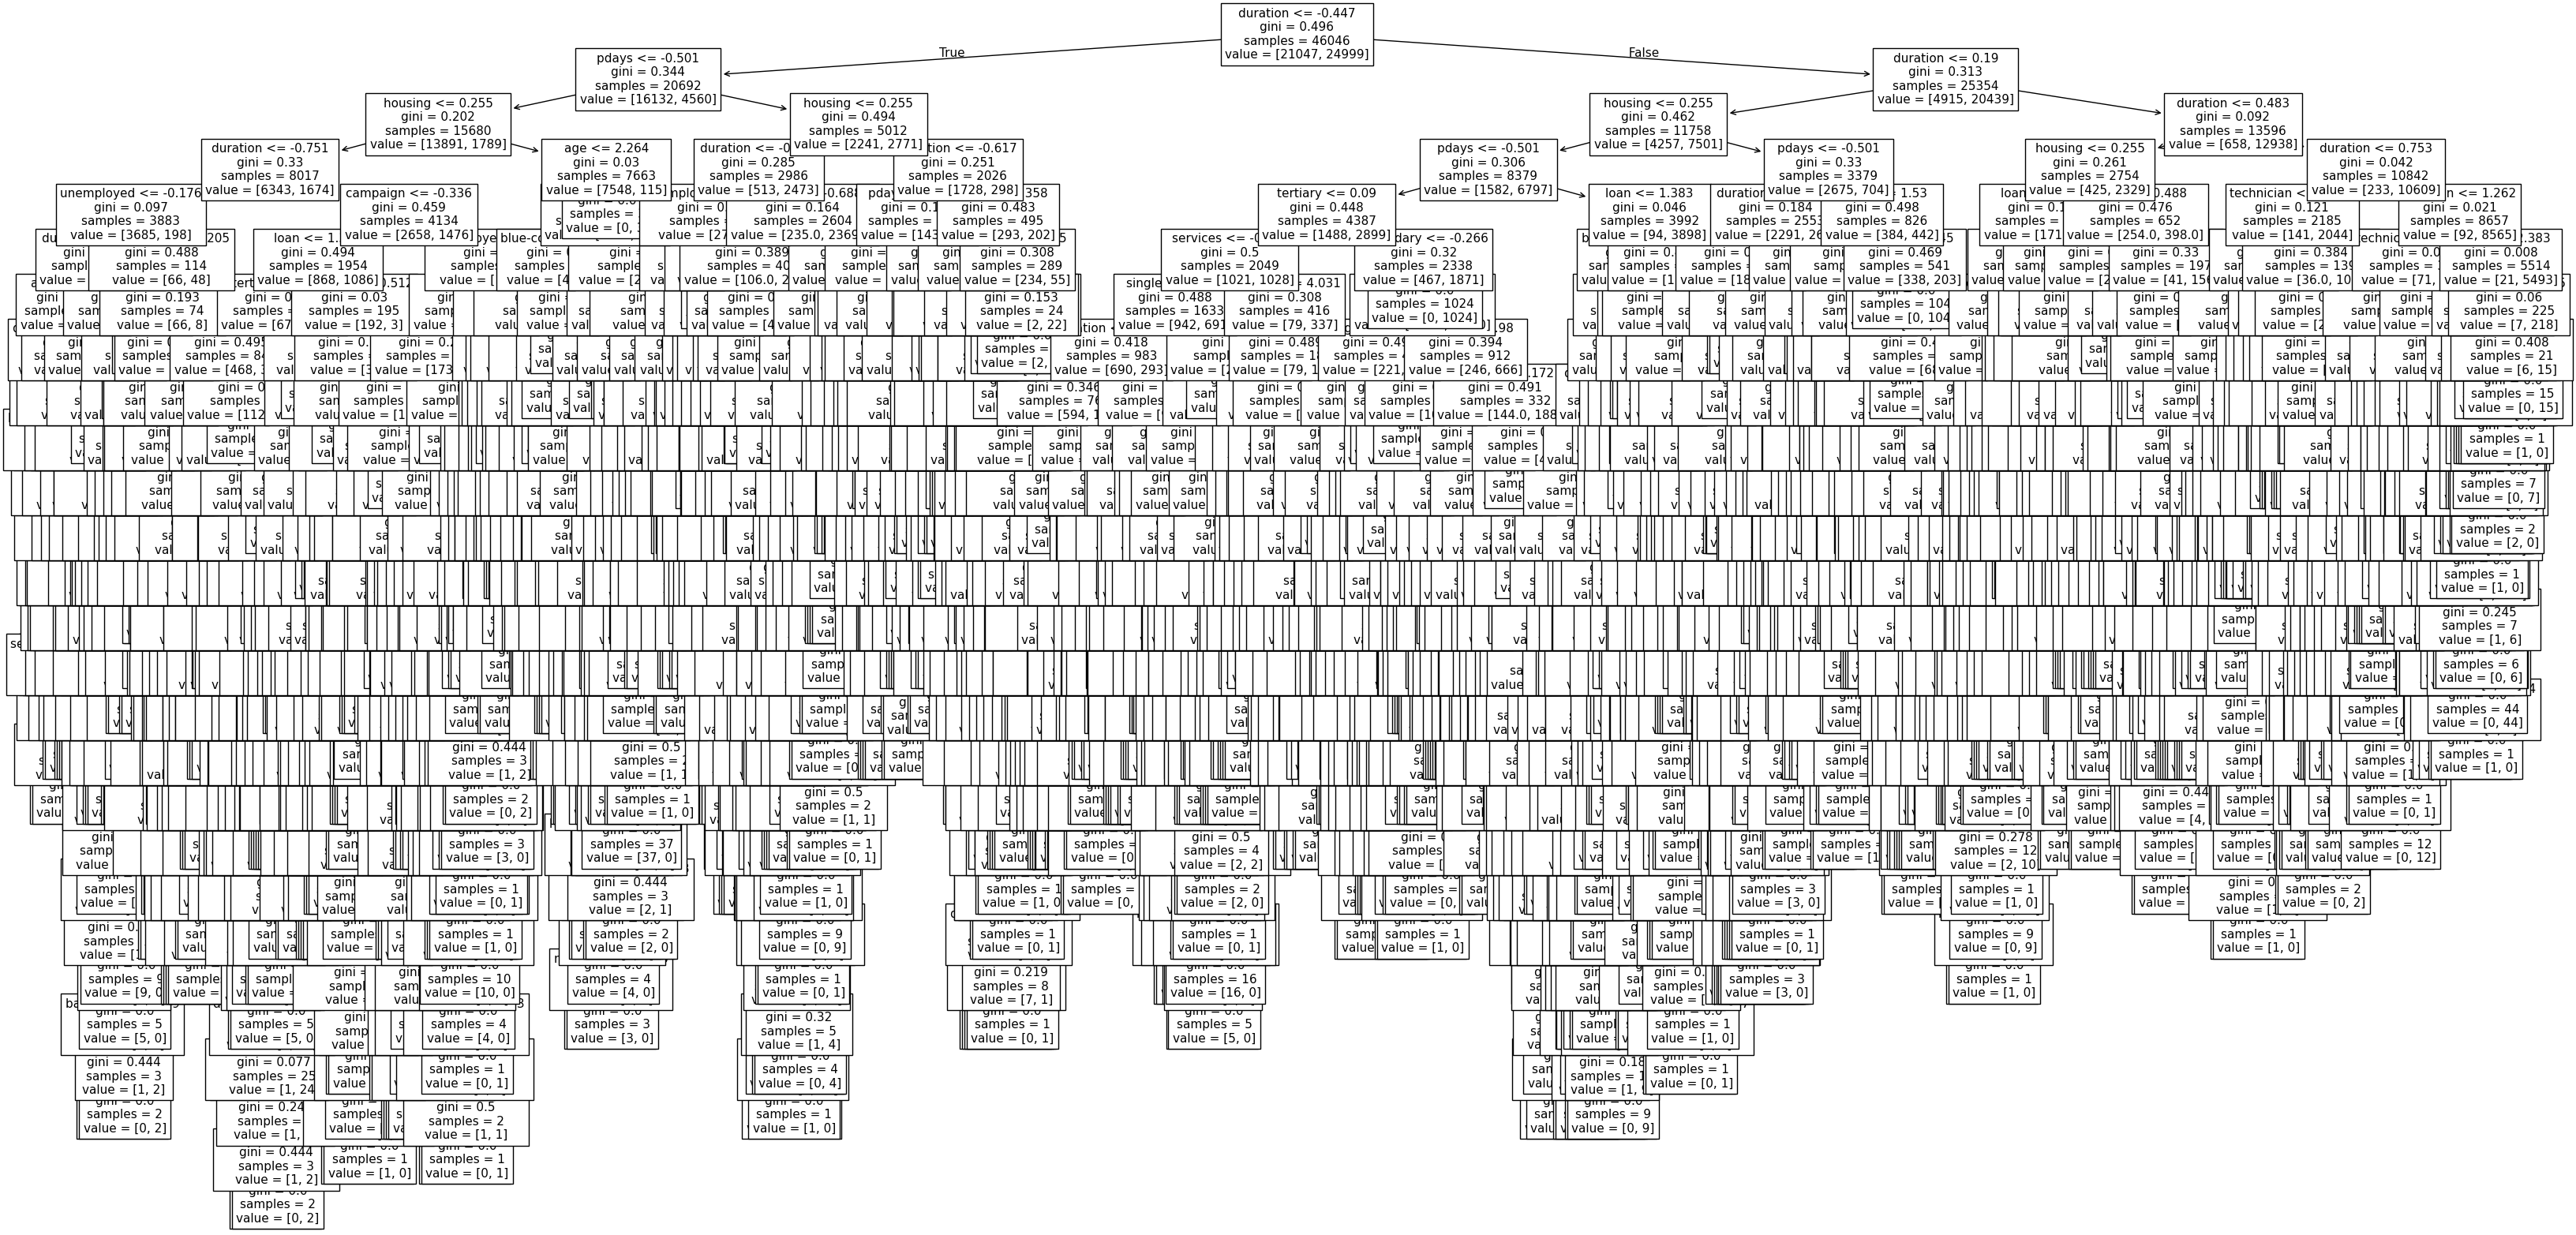

In [510]:
feature_names = list(X.columns)
fig, ax = plt.subplots(figsize=(40, 20))
plot_tree(decision_tree1, feature_names=feature_names, fontsize=11)
plt.show()

# decision tree sa entropijom i sa orezivanjem

In [511]:

decision_tree2 = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                    max_features=8, min_samples_leaf=1,
                    min_samples_split=2, random_state=43,
                    ccp_alpha=0.01)


decision_tree2 = decision_tree2.fit(X_train, y_train)
y_pred = decision_tree2.predict(X_test)

print("Tačnost stabla odlučivanja primenom entropije i sa orezivanjem:")
print(accuracy_score(y_test, y_pred))


Tačnost stabla odlučivanja primenom entropije i sa orezivanjem:
0.8886379430159833


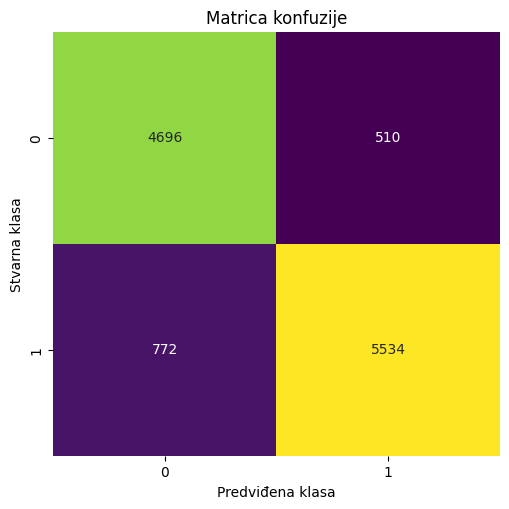

In [512]:
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title("Matrica konfuzije"), plt.tight_layout()
plt.ylabel("Stvarna klasa"), plt.xlabel("Predviđena klasa")
plt.show()

In [513]:
target_names = ['0', '1']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      5206
           1       0.92      0.92      0.92      6306

    accuracy                           0.92     11512
   macro avg       0.91      0.91      0.91     11512
weighted avg       0.92      0.92      0.92     11512



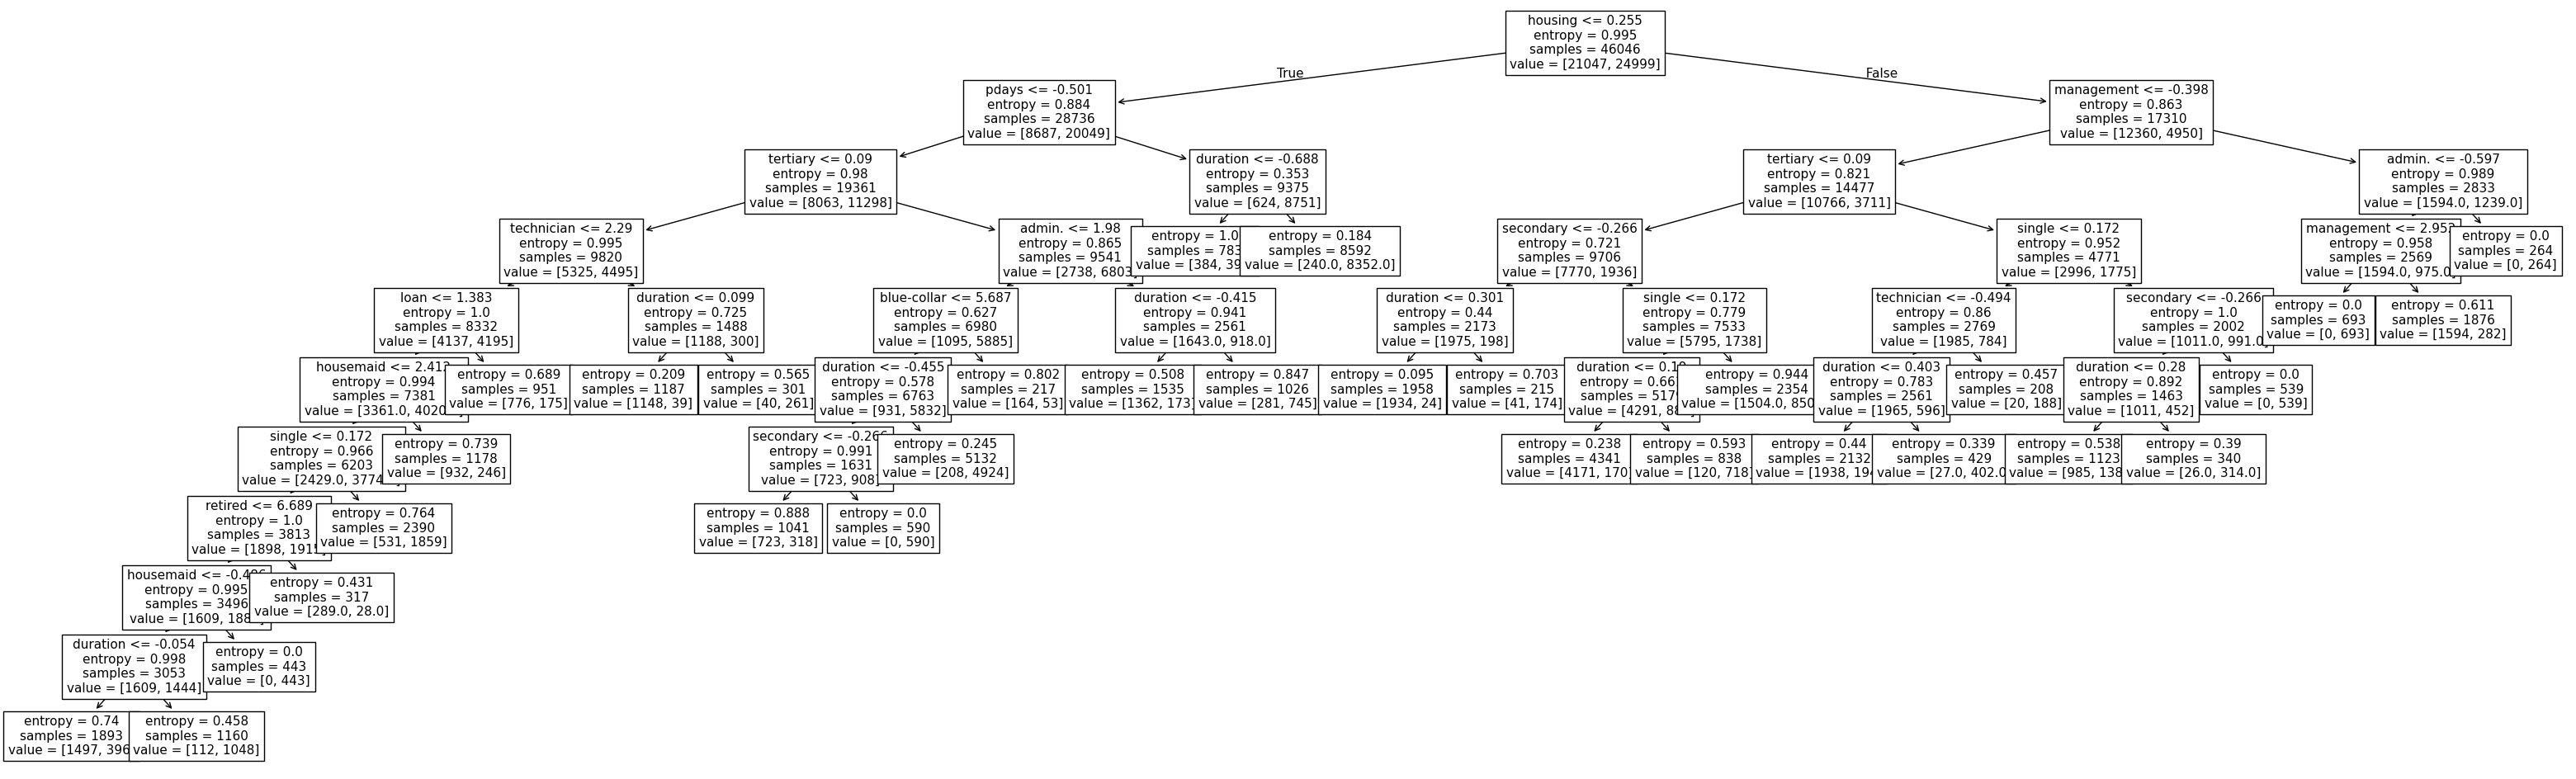

In [514]:

feature_names = list(X.columns)

fig, ax = plt.subplots(figsize=(40, 12))
plot_tree(decision_tree2, feature_names=feature_names, fontsize=11)
plt.show()
